# NEED to run this command in your environment 
# pip install psycopg2-binary

In [ ]:
# import the dependencies
import psycopg2
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Scikit-Learn and Shallow Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
# TF and Keras-related imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# make the connection string to AWS RDS Database
conn_string="host=housingaws-db.cnvxuytbvp1m.us-east-1.rds.amazonaws.com" +" port=5432" +" dbname=housing_database"+" user=postgres"  \
                  +" password=team2data"
#connect to RDS
conn = psycopg2.connect(conn_string)
print("Connected!")    

In [ ]:
# Read the data from RDS as Pandas 
df=pd.read_sql_query("select * from housing",con=conn)
df.head(10)

In [ ]:
# We can analyze the distribution of the various sales prices on our home dataset 
fig, ax = plt.subplots(figsize=(20,15))
sns.histplot(x=df['SalePrice'], kde=True, ax=ax, alpha=0.4).set(title = "Sale Prices in Ames Housing")
plt.show()

In [1]:
# Boxplot 

sns.boxplot(x=df["SalePrice"])

In [ ]:
# Description of the Interquartile ranges 

print(df['SalePrice'].describe())

In [2]:
# load the csv dataset
file_path="C:\\Users/nisha/Documents/Final_Project/Deliverable_1_Triangle/Images/AmesHousing.csv"
housing_df=pd.read_csv(file_path)
housing_df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
housing_df.columns


Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [4]:
# We can drop the ID column as well as the order as the information is not necessary for our dataset 

df = pd.read_csv("C:\\Users/nisha/Documents/Final_Project/Deliverable_1_Triangle/Images/AmesHousing.csv")
df.drop(['Order', 'PID'], axis=1, inplace=True)


# Exploring our Data 

AttributeError: 'function' object has no attribute 'set'

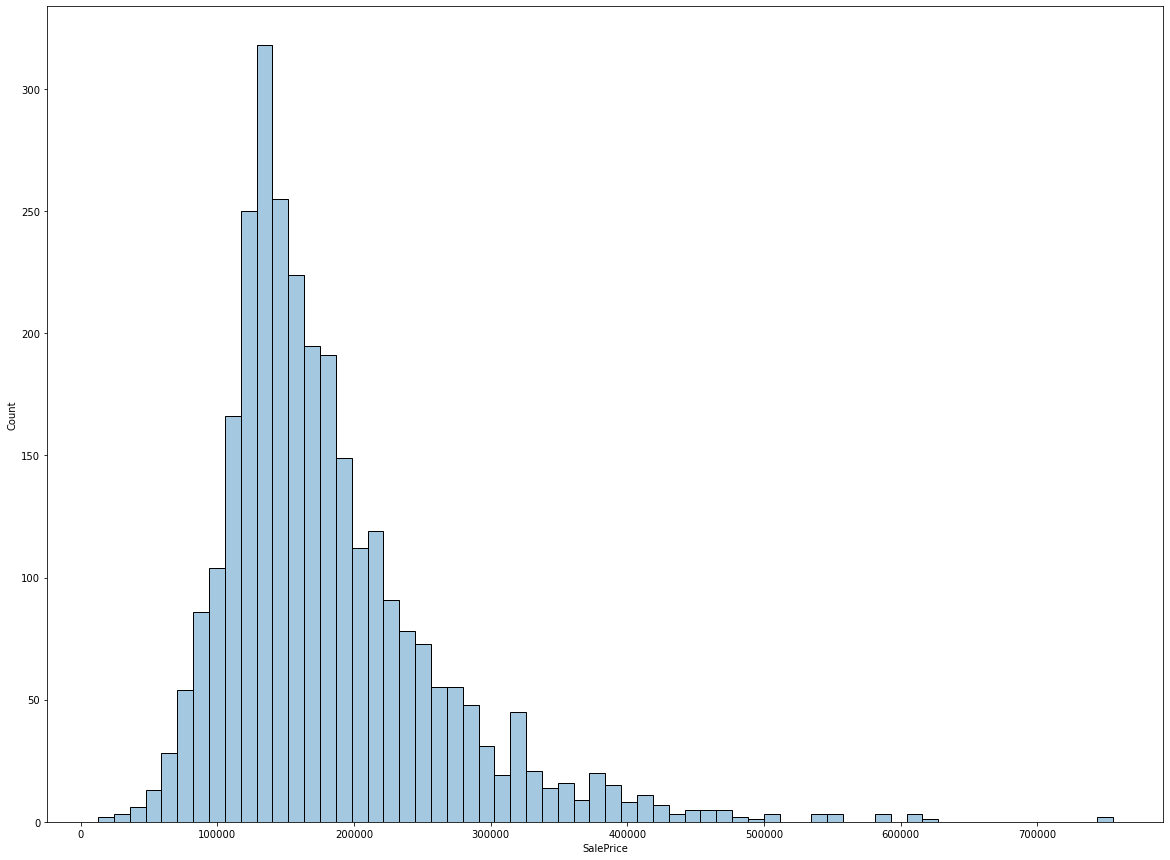

In [5]:
# We can analyze the distribution of the various sales prices on our home dataset 
fig, ax = plt.subplots(figsize=(20,15))
sns.histplot(x=df['SalePrice'], kde=False, ax=ax, alpha=0.4)
sns.histplot.set(title = "Sale Prices in Ames Housing")

In [ ]:
# Boxplot 

sns.boxplot(x=df["SalePrice"])


In [ ]:
# Description of the Interquartile ranges 

print(df['SalePrice'].describe())

In [ ]:
# We could further inspect outliers (this is something to explore over the next deliverable)
# Use heatmap or another way to show correaltion

In [ ]:
# Examining Correlation amongst features: 

fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(
    x=df['Year Built'],
    y=df['SalePrice'],
    color='orange',
    edgecolors='black',
    linewidths=0.4,
    alpha=0.8,
    )

plt.show()


In [ ]:
# Living Area vs Sales Price 

fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(
    x=df['Gr Liv Area'],
    y=df['SalePrice'],
    color='orange',
    edgecolors='blue',
    linewidths=0.4,
    alpha=0.8,
    )

plt.show()


# Data Preprocessing

In [ ]:
# DataPreprocessing:  

# Importance behind Data Preprocessing in our specfic scenario: 
# We might not have houses being sold in a normal condition
# We can have houses that might have had rush sales due to owner requiring money quickly
# We can have data missing for specific features which can skew our results

# Steps to tackle these issues: 
# 1. Identifying Missing Values 
# 2. Decide on what to do with the Missing Values, either remove column/rows or replace with mean value 
# 3. One-Hot Encoding of Categorical Variables ( we will turn our categorical variables in our numerical data type)
# 4. Observing Variable datatypes captured by Pandas, sometimes they provide incorrect data variable type 
# 5. Splitting our data into X_train, X_test, y_train & y_test 
# 6. Standardizing our variable except the target variable 


# exploring data, did you see any trend? 
# what sort of analysis are you doing?

In [ ]:
# Identifying the Number of Missing Values 

missing_values = pd.DataFrame({
    'Column': df.columns.values,
    'Number of Missing Value': df.isna().sum().values,
    'Missing Value %': 100 * df.isna().sum().values / len(df),})

missing_values = missing_values[missing_values['Number of Missing Value'] > 0]
print(missing_values.sort_values(by='Number of Missing Value').reset_index(drop=True))



# Drop Variables with too many Missing Values

In [6]:

# Identifying the Number of Missing Values - Remove Missing Values with a higher percentage than 80% 

df.drop(['Fence', 'Alley', 'Misc Feature', 'Pool QC', 'Fireplace Qu', 'Lot Frontage'], axis=1, inplace=True)

df.shape

(2930, 74)

In [7]:
# We must decide what we are going to do with all the other variables that have missing values and identify whether the variables are categorical or numerical 

cols_with_missing_values = df.columns[df.isna().sum() > 0]
for col in cols_with_missing_values:

# Print Info 
    
    print(col)
    print(df[col].unique()[:5])

Mas Vnr Type
['Stone' 'None' 'BrkFace' nan 'BrkCmn']
Mas Vnr Area
[112.   0. 108.  20. 603.]
Bsmt Qual
['TA' 'Gd' 'Ex' nan 'Fa']
Bsmt Cond
['Gd' 'TA' nan 'Po' 'Fa']
Bsmt Exposure
['Gd' 'No' 'Mn' 'Av' nan]
BsmtFin Type 1
['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf']
BsmtFin SF 1
[ 639.  468.  923. 1065.  791.]
BsmtFin Type 2
['Unf' 'LwQ' 'BLQ' 'Rec' nan]
BsmtFin SF 2
[   0.  144. 1120.  163.  168.]
Bsmt Unf SF
[ 441.  270.  406. 1045.  137.]
Total Bsmt SF
[1080.  882. 1329. 2110.  928.]
Electrical
['SBrkr' 'FuseA' 'FuseF' 'FuseP' nan]
Bsmt Full Bath
[ 1.  0.  2.  3. nan]
Bsmt Half Bath
[ 0.  1. nan  2.]
Garage Type
['Attchd' 'BuiltIn' 'Basment' 'Detchd' nan]
Garage Yr Blt
[1960. 1961. 1958. 1968. 1997.]
Garage Finish
['Fin' 'Unf' 'RFn' nan]
Garage Cars
[2. 1. 3. 0. 4.]
Garage Area
[528. 730. 312. 522. 482.]
Garage Qual
['TA' nan 'Fa' 'Gd' 'Ex']
Garage Cond
['TA' nan 'Fa' 'Gd' 'Ex']


In [8]:
# Train & Test Split onto the missing values

train_df, test_df = train_test_split(df, test_size=0.2)


In [9]:
# Replacing the values of our numerical values 

num_with_missing = ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
                    'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 
                    'Garage Yr Blt', 'Garage Cars', 'Garage Area']

for n_col in num_with_missing:
    train_df[n_col] = train_df[n_col].fillna(train_df[n_col].mean())
    test_df[n_col] = test_df[n_col].fillna(test_df[n_col].mean())

In [10]:
# Replacing the values of our categorical values

cat_with_missing = [x for x in cols_with_missing_values if x not in num_with_missing]

for c_col in cat_with_missing:
    train_df[c_col] = train_df[c_col].fillna(train_df[c_col].mode().to_numpy()[0])
    test_df[c_col] = test_df[c_col].fillna(test_df[c_col].mode().to_numpy()[0])
    
    
# Our dataset should not have any more missing variables at this point, we can run a code to double check if this is true


# We could further inspect outliers (this is something to explore over the next deliverable)
# Use heatmap or another way to show correaltion

In [ ]:
# Examining Correlation amongst features: 

fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(
    x=df['Year Built'],
    y=df['SalePrice'],
    color='orange',
    edgecolors='black',
    linewidths=0.4,
    alpha=0.8,
    )

plt.show()

In [ ]:
# Living Area vs Sales Price 

fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(
    x=df['Gr Liv Area'],
    y=df['SalePrice'],
    color='orange',
    edgecolors='blue',
    linewidths=0.4,
    alpha=0.8,
    )

plt.show()

In [11]:
df.isna().sum()

# ERROR spotted on LOT FRONTAGE Feature (figure out why this error is arising)

MS SubClass       0
MS Zoning         0
Lot Area          0
Street            0
Lot Shape         0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 74, dtype: int64

# One Hot Encoding our Categorical Variables

In [12]:
# Checking our Variables Data Types & Confirm whether Pandas is reading any of these variables incorrectly 
data_types = pd.DataFrame({
    'Column': train_df.select_dtypes(exclude='object').columns.values,
    'Data type': train_df.select_dtypes(exclude='object').dtypes.values})

print(data_types)

             Column Data type
0       MS SubClass     int64
1          Lot Area     int64
2      Overall Qual     int64
3      Overall Cond     int64
4        Year Built     int64
5    Year Remod/Add     int64
6      Mas Vnr Area   float64
7      BsmtFin SF 1   float64
8      BsmtFin SF 2   float64
9       Bsmt Unf SF   float64
10    Total Bsmt SF   float64
11       1st Flr SF     int64
12       2nd Flr SF     int64
13  Low Qual Fin SF     int64
14      Gr Liv Area     int64
15   Bsmt Full Bath   float64
16   Bsmt Half Bath   float64
17        Full Bath     int64
18        Half Bath     int64
19    Bedroom AbvGr     int64
20    Kitchen AbvGr     int64
21    TotRms AbvGrd     int64
22       Fireplaces     int64
23    Garage Yr Blt   float64
24      Garage Cars   float64
25      Garage Area   float64
26     Wood Deck SF     int64
27    Open Porch SF     int64
28   Enclosed Porch     int64
29       3Ssn Porch     int64
30     Screen Porch     int64
31        Pool Area     int64
32        

# Perform One-Hot Encoding

In [2]:
# Perform One Hot Encoding 

accepted_vars = ['MS SubClass', 'Lot Area',
                 'Overall Qual', 'Overall Cond',
                 'Year Built', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
                 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 
                 'Kitchen AbvGr', 'TotRms AbvGrd', 'Garage Area', 
                 'Pool Area', 'SalePrice']

train_df = train_df[accepted_vars]
test_df = test_df[accepted_vars] 

NameError: name 'train_df' is not defined

In [14]:
train_df = pd.get_dummies(train_df).reset_index(drop=True)
test_df = pd.get_dummies(test_df).reset_index(drop=True)



In [15]:
print(test_df)

     MS SubClass  Lot Area  Overall Qual  Overall Cond  Year Built  \
0             50     13758             7             5        1990   
1             90     10126             6             5        1997   
2             20      8125             7             5        2002   
3             20      9900             5             5        1961   
4             50      8520             3             5        1916   
..           ...       ...           ...           ...         ...   
581           20    115149             7             5        1971   
582           20     10130             8             5        2007   
583           60     10800             6             7        1974   
584          160      2665             5             6        1977   
585           60     10625             7             5        2005   

     Total Bsmt SF  1st Flr SF  2nd Flr SF  Gr Liv Area  Full Bath  Half Bath  \
0           1156.0        1187         530         1717          2          1 

In [16]:
print (train_df)
df.shape

      MS SubClass  Lot Area  Overall Qual  Overall Cond  Year Built  \
0              60      7750             7             5        2003   
1              20      6600             5             9        1982   
2              20      9768             5             5        1955   
3              20      7321             7             5        1999   
4              60     15600             5             7        1950   
...           ...       ...           ...           ...         ...   
2339           50      7506             5             8        1925   
2340           20     14601             9             5        2006   
2341           50      6240             5             7        1936   
2342           60     11700             6             6        1968   
2343           20     51974             9             5        2006   

      Total Bsmt SF  1st Flr SF  2nd Flr SF  Gr Liv Area  Full Bath  \
0             660.0         660         660         1320          2   
1    

(2930, 74)

# Split Data into X_train, X_test, y_train & y_test

In [17]:
# Split Data :
# X_train - X_test - y_train - y_test

X_train, y_train = train_df, train_df.pop('SalePrice')
X_test, y_test = test_df, test_df.pop('SalePrice')

In [18]:
print (test_df.pop)

<bound method DataFrame.pop of      MS SubClass  Lot Area  Overall Qual  Overall Cond  Year Built  \
0             50     13758             7             5        1990   
1             90     10126             6             5        1997   
2             20      8125             7             5        2002   
3             20      9900             5             5        1961   
4             50      8520             3             5        1916   
..           ...       ...           ...           ...         ...   
581           20    115149             7             5        1971   
582           20     10130             8             5        2007   
583           60     10800             6             7        1974   
584          160      2665             5             6        1977   
585           60     10625             7             5        2005   

     Total Bsmt SF  1st Flr SF  2nd Flr SF  Gr Liv Area  Full Bath  Half Bath  \
0           1156.0        1187         530     

In [19]:
print (train_df.pop)

<bound method DataFrame.pop of       MS SubClass  Lot Area  Overall Qual  Overall Cond  Year Built  \
0              60      7750             7             5        2003   
1              20      6600             5             9        1982   
2              20      9768             5             5        1955   
3              20      7321             7             5        1999   
4              60     15600             5             7        1950   
...           ...       ...           ...           ...         ...   
2339           50      7506             5             8        1925   
2340           20     14601             9             5        2006   
2341           50      6240             5             7        1936   
2342           60     11700             6             6        1968   
2343           20     51974             9             5        2006   

      Total Bsmt SF  1st Flr SF  2nd Flr SF  Gr Liv Area  Full Bath  \
0             660.0         660         660  

# Feature Scaling by using Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
print(X_train)

[[ 0.04419164 -0.31109856  0.65737598 ... -0.28043512 -0.33932319
  -0.0673828 ]
 [-0.8837833  -0.46412998 -0.76607834 ... -0.91616038 -0.97350772
  -0.0673828 ]
 [-0.8837833  -0.04256171 -0.76607834 ... -0.91616038 -0.6657417
  -0.0673828 ]
 ...
 [-0.1878021  -0.51203546 -0.76607834 ... -0.91616038  0.70521603
  -0.0673828 ]
 [ 0.04419164  0.21453107 -0.05435118 ...  0.99101541 -0.14813521
  -0.0673828 ]
 [-0.8837833   5.57382416  2.0808303  ...  0.99101541  2.9714931
  -0.0673828 ]]


In [22]:
print(X_test)

[[-0.1878021   0.48839076  0.65737598 ...  0.35529014 -0.33932319
  -0.0673828 ]
 [ 0.74017285  0.00507764 -0.05435118 ...  0.99101541  1.15753882
  -0.0673828 ]
 [-0.8837833  -0.26119702  0.65737598 ... -0.28043512  1.99223758
  -0.0673828 ]
 ...
 [ 0.04419164  0.09476735 -0.05435118 ...  1.62674067  0.70521603
  -0.0673828 ]
 [ 2.364129   -0.98776354 -0.76607834 ... -0.28043512 -0.63776297
  -0.0673828 ]
 [ 0.04419164  0.07147996  0.65737598 ...  1.62674067  2.16010995
  -0.0673828 ]]


In [23]:
### Using our Deliverable ML_model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing


# Shallow Learning 

In [24]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
import xgboost as xgb

In [26]:
# Initialize our Shallow Learning Regressors from Scikit-Learn 

linear_regressor = LinearRegression()
dtr = DecisionTreeRegressor() 
forest = RandomForestRegressor()
xgboost = xgb.XGBRegressor() 

In [27]:
# Fitting our Regressors: 

linear_regressor.fit(X_train, y_train) 
dtr.fit(X_train, y_train) 
forest.fit(X_train, y_train) 
xgboost.fit(X_train, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [28]:
# Making predictions on the test set
y_pred_linear = linear_regressor.predict(X_test) 
y_pred_dtr = dtr.predict(X_test) 
y_pred_forest = forest.predict(X_test)
y_pred_xgboost = xgboost.predict(X_test) 

In [29]:
y_pred_elastic = linear_regressor.predict(X_test)
y_pred_dtr = dtr.predict(X_test)
y_pred_forest = forest.predict(X_test)
y_pred_xgboost = xgboost.predict(X_test)

from sklearn import metrics

print('LinearRegressor Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_elastic))
print('LinearRegressor Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_elastic))
print('LinearRegressor Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic)))
print('LinearRegressor Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_elastic)*100)
print('LinearRegressor Mean Squared Logarithmic Error', np.log(metrics.mean_squared_error(y_test, y_pred_linear)))

print('\n')

print('DTR Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dtr))
print('DTR Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dtr))
print('DTR Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr)))
print('DTR Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_dtr)*100)
print('DTR Mean Squared Logarithmic Error', np.log(metrics.mean_squared_error(y_test, y_pred_dtr)))

print('\n')

print('RFR Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_forest))
print('RFR Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_forest))
print('RFR Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest)))
print('RFR Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_forest)*100)
print('RFR Mean Squared Logarithmic Error', np.log(metrics.mean_squared_error(y_test, y_pred_forest)))

print('\n')


print('XGBoost Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgboost))
print('XGBoost Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgboost))
print('XGBoost Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost)))
print('XGBoost Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_xgboost)*100)
print('XGBoost Mean Squared Logarithmic Error', np.log(metrics.mean_squared_error(y_test, y_pred_xgboost)))

LinearRegressor Mean Absolute Error: 21595.450189311883
LinearRegressor Mean Squared Error: 1258092949.7809412
LinearRegressor Root Mean Squared Error: 35469.60599979849
LinearRegressor Mean Absolute Percentage Error: 13.050580631477196
LinearRegressor Mean Squared Logarithmic Error 20.952862879443437


DTR Mean Absolute Error: 23664.384527872582
DTR Mean Squared Error: 1179665646.8153205
DTR Root Mean Squared Error: 34346.261031083435
DTR Mean Absolute Percentage Error: 14.397238814714033
DTR Mean Squared Logarithmic Error 20.888496885116236


RFR Mean Absolute Error: 17012.745436832978
RFR Mean Squared Error: 705926599.3702648
RFR Root Mean Squared Error: 26569.27924069949
RFR Mean Absolute Percentage Error: 10.513100183886479
RFR Mean Squared Logarithmic Error 20.375021823154942


XGBoost Mean Absolute Error: 17657.821045755118
XGBoost Mean Squared Error: 673407025.3567449
XGBoost Root Mean Squared Error: 25950.08719362509
XGBoost Mean Absolute Percentage Error: 10.540805969112478
X

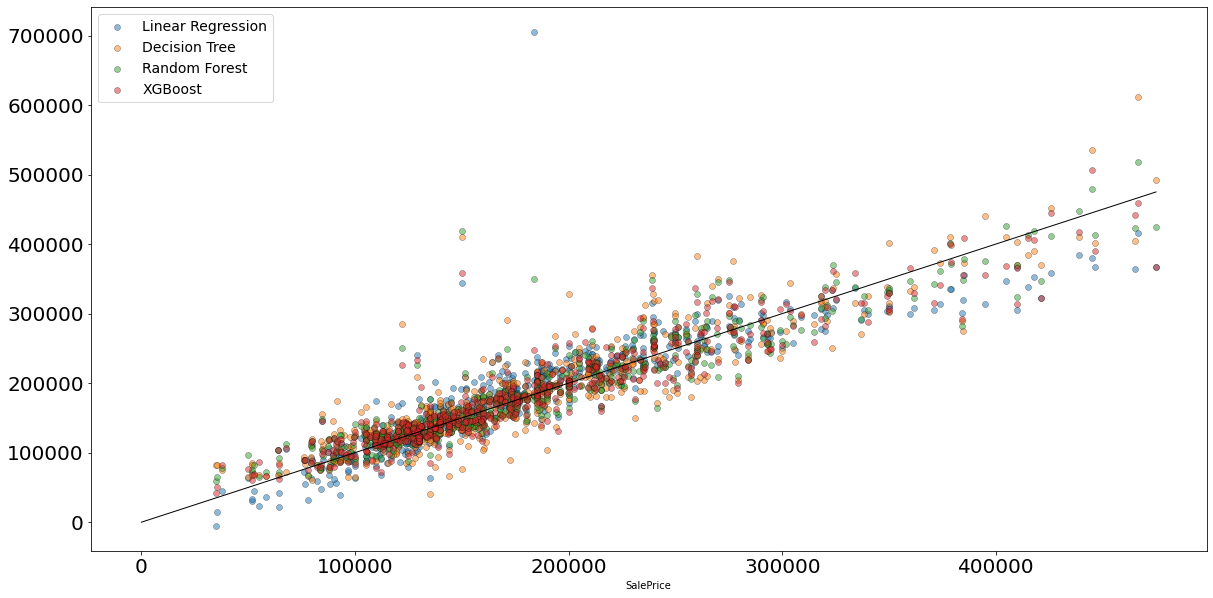

In [30]:
## Would be a great visual for our dashboard in telling our story and why we chose our decision

# We would want to visualize the predicted values in comparison to the real values in the test set: 

fig, ax = plt.subplots(figsize=(20,10)) 

# Scatterplots of predictions
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.5, lw=1, ec='black', ax=ax, label='Linear Regression')
sns.scatterplot(x=y_test, y=y_pred_dtr, alpha=0.5, lw=1, ec='black', ax=ax, label='Decision Tree')
sns.scatterplot(x=y_test, y=y_pred_forest, alpha=0.5, lw=1, ec='black', ax=ax, label='Random Forest')
sns.scatterplot(x=y_test, y=y_pred_xgboost, alpha=0.5, lw=1, ec='black', ax=ax, label='XGBoost')

# Diagonal reference line
lims = [0, max(y_test.max(), y_test.max())]
plt.plot(lims, lims, lw=1, color='black')


# Visual: 
# Diagonal reference line
lims = [0, max(y_test.max(), y_test.max())]

# Legend and tick styling
plt.legend(prop={'size': 14})
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [31]:
# Decide on Loss Function:

# 1. Mean Absolute Error (MAE) 
# 2. Mean Squared Error (MSE) 
# 3. Root Mean Squared Error (RMSE)
# 4. Mean Absolute Percentage Error (MAPE)
# 5. Mean Squared Logarithmic Error (MSLE 

# Importance of Loss Function Decision: The metric that we use will let us know whether our model is doing well or not, and then we align the metric to the loss function
# Training a simple neural network  and compare our loss function selection

In [32]:
# From our preliminary model we are able to see that Random Forest provides the most accurate results 
# For deliverable 3 we can furhter investigate more into other algorithms and fine-tune our variables 

# Deep Learning

In [33]:
def define_model(loss_func):
    # Starting out with placeholder, single-layer network with 64 neurons each (educated guess)
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dropout(0.3, seed=2),
        layers.Dense(64, activation='swish'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    # Placeholder optimizer until we test different ones
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    
    model.compile(loss=loss_func,
                  optimizer=optimizer,
                  metrics=['mae', 'mse', 'mape'])
    
    return model

In [ ]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import gradient_descent_v2
from tensorflow.keras import layers


In [1]:
loss_functions = ['mse', 'mae', 'huber_loss', 'mape', 'mean_squared_logarithmic_error']
histories = []

for index, func in enumerate(loss_functions, 1):
    model = define_model(func)
    history = model.fit(
        X_train, y_train,
        epochs=70,
        validation_split=0.2,
        verbose=0)
    loss, mae, mse, mape = model.evaluate(X_test, y_test, verbose=0)
    print(f'Finished training model {index} with {func} loss function | MAE: {mae:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}')
    histories.append(history)

NameError: name 'define_model' is not defined